# Face and Eye detection

In [13]:
"""
Face and eye detection using opencv (Haar Cascade classificaion)

Download face and eye models:
Go to these links, click on RAW and save as... otherwise you'd be saving html files of Github page. '
    https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
    https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
    
"""

#Verify on static image

import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('images/obamas.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#First detect face and then look for eyes inside the face.
#Multiscale refers to detecting objects (faces) at multiple scales. 
faces = face_cascade.detectMultiScale(gray, 1.3, 5) #scaleFactor = 1.3, minNeighbors = 3
#Above faces returns a list of rectangles. For Obama image we only have 1 face
#so it return a tuplr of (1,4) --> 1 represents one rectangle and 4 represents
#the x,y,w,h values that define the square.

#Obamas image with both barack and Michelle it returns a tuple of (2,4) --> 2 faces.

#For each detected face now detect eyes. 
#For emotion detection this is where we update code to identify facial emotion
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)   #Draw red bounding box around the face
    roi_gray = gray[y:y+h, x:x+w] #Original gray image but only the detected face part
    roi_color = img[y:y+h, x:x+w] #Original color image but only the detected face part. For display purposes
    eyes = eye_cascade.detectMultiScale(roi_gray) #Use the gray face image to detect eyes
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) #Draw green bounding boxes around the eyes

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


########################################################

#Apply the above logic to a live video
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('/Users/sambhav/Projects/image_processing/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/sambhav/Projects/image_processing/haarcascade_eye.xml')

#Check if your system can detect camera and what is the source number
# cams_test = 10
# for i in range(0, cams_test):
#     cap = cv2.VideoCapture(i)
#     test, frame = cap.read()
#     print("i : "+str(i)+" /// result: "+str(test))


cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    #First detect face and then look for eyes inside the face.
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:      #Press Esc to stop the video
        break

cap.release()
cv2.destroyAllWindows()

# Training model on facial emotions

In [13]:
import sklearn

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


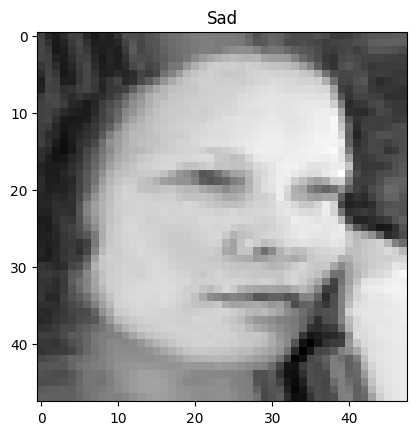

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


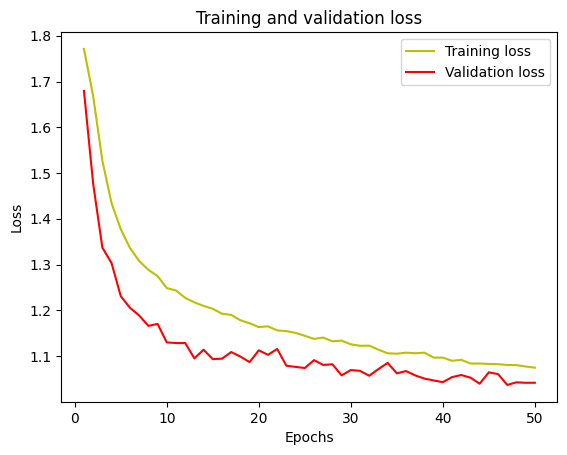

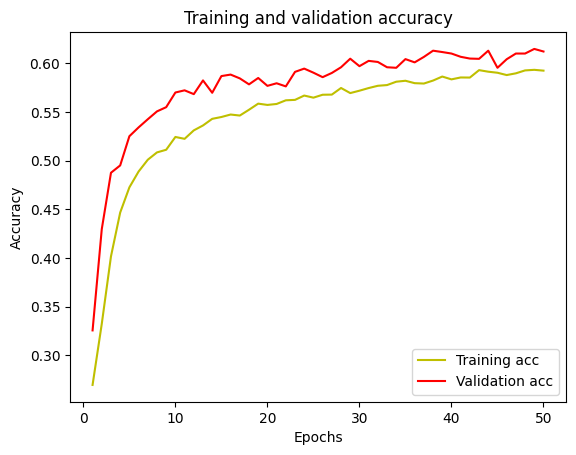

1/1 [==============================] - 0s 166ms/step


ModuleNotFoundError: No module named 'sklearn'

In [10]:
# https://youtu.be/P4OevrwTq78
"""
Train a deep learning model on facial emotion detection

Dataset from: https://www.kaggle.com/msambare/fer2013
"""

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

IMG_HEIGHT=48 
IMG_WIDTH = 48
batch_size=32

train_data_dir='images/train/'
validation_data_dir='images/test/'

train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()

import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()
##########################################################


###########################################################
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


train_path = "images/train"
test_path = "images/test"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)


# Calculate the number of steps per epoch and validation steps
steps_per_epoch = num_train_imgs // batch_size
validation_steps = num_test_imgs // batch_size

epochs = 50

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

model.save('emotion_detection_model_100epochs.h5')

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

####################################################################
from keras.models import load_model


#Test the model
my_model = load_model('emotion_detection_model_100epochs.h5', compile=False)

#Generate a batch of images
test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)


Accuracy =  0.65625


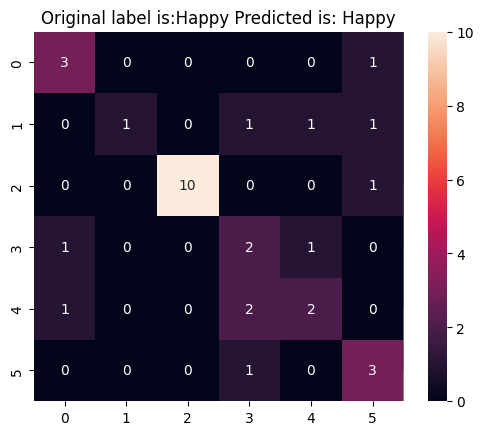

In [15]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

# Traning model to predict age and gender


In [16]:
"""
Train deep learning models to predict age and gender.

Datase from here: https://susanqq.github.io/UTKFace/
"""

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

path = "UTKFace/UTKFace"
images = []
age = []
gender = []
for img in os.listdir(path):
  ages = img.split("_")[0]
  genders = img.split("_")[1]
  img = cv2.imread(str(path)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  images.append(np.array(img))
  age.append(np.array(ages))
  gender.append(np.array(genders))
  
age = np.array(age,dtype=np.int64)
images = np.array(images)   #Forgot to scale image for my training. Please divide by 255 to scale. 
gender = np.array(gender,np.uint64)

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, age, random_state=42)

x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, random_state=42)

##################################################
#Define age model and train. 
##################################

age_model = Sequential()
age_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(200,200,3)))
#age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))
              
age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Flatten())
age_model.add(Dropout(0.2))
age_model.add(Dense(512, activation='relu'))

age_model.add(Dense(1, activation='linear', name='age'))
              
age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(age_model.summary())              
                           
history_age = age_model.fit(x_train_age, y_train_age,
                        validation_data=(x_test_age, y_test_age), epochs=50)

age_model.save('age_model_1epochs.h5')

################################################################
#Define gender model and train
##################################################
gender_model = Sequential()

gender_model.add(Conv2D(36, kernel_size=3, activation='relu', input_shape=(200,200,3)))

gender_model.add(MaxPool2D(pool_size=3, strides=2))
gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.2))
gender_model.add(Dense(512, activation='relu'))
gender_model.add(Dense(1, activation='sigmoid', name='gender'))

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_gender = gender_model.fit(x_train_gender, y_train_gender,
                        validation_data=(x_test_gender, y_test_gender), epochs=50)

gender_model.save('gender_model_50epochs.h5')


############################################################

history = history_age

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

####################################################################
from keras.models import load_model
#Test the model
my_model = load_model('gender_model_50epochs.h5', compile=False)


predictions = my_model.predict(x_test_gender)
y_pred = (predictions>= 0.5).astype(int)[:,0]

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test_gender, y_pred)  
sns.heatmap(cm, annot=True)


FileNotFoundError: [Errno 2] No such file or directory: 'UTKFace/UTKFace'

# Live prediction of Age, gender and emotion

In [ ]:
# https://youtu.be/JmvmUWIP2v8
"""
Live prediction of emotion, age, and gender using pre-trained models. 
Uses haar Cascades classifier to detect face..
then, uses pre-trained models for emotion, gender, and age to predict them from 
live video feed. 

"""

from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier=cv2.CascadeClassifier('haarcascades_models/haarcascade_frontalface_default.xml')
emotion_model = load_model('emotion_detection_model_100epochs.h5')
age_model = load_model('age_model_50epochs.h5')
gender_model = load_model('gender_model_50epochs.h5')

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
gender_labels = ['Male', 'Female']

cap=cv2.VideoCapture(0)

while True:
    ret,frame=cap.read()
    labels=[]
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        #Get image ready for prediction
        roi=roi_gray.astype('float')/255.0  #Scale
        roi=img_to_array(roi)
        roi=np.expand_dims(roi,axis=0)  #Expand dims to get it ready for prediction (1, 48, 48, 1)

        preds=emotion_model.predict(roi)[0]  #Yields one hot encoded result for 7 classes
        label=class_labels[preds.argmax()]  #Find the label
        label_position=(x,y)
        cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
        #Gender
        roi_color=frame[y:y+h,x:x+w]
        roi_color=cv2.resize(roi_color,(200,200),interpolation=cv2.INTER_AREA)
        gender_predict = gender_model.predict(np.array(roi_color).reshape(-1,200,200,3))
        gender_predict = (gender_predict>= 0.5).astype(int)[:,0]
        gender_label=gender_labels[gender_predict[0]] 
        gender_label_position=(x,y+h+50) #50 pixels below to move the label outside the face
        cv2.putText(frame,gender_label,gender_label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
        #Age
        age_predict = age_model.predict(np.array(roi_color).reshape(-1,200,200,3))
        age = round(age_predict[0,0])
        age_label_position=(x+h,y+h)
        cv2.putText(frame,"Age="+str(age),age_label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
   
    cv2.imshow('Emotion Detector', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()